In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("notebook")

In [2]:
aisles = pd.read_csv('aisles.csv')
depart = pd.read_csv('departments.csv')
products = pd.read_csv('products.csv')
orders = pd.read_csv('orders.csv')
order_prior = pd.read_csv('order_products__prior.csv')
order_train = pd.read_csv('order_products__train.csv')

In [3]:
print(aisles.head())
print('******************************************************************************************')
print(aisles.info())

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
******************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [4]:
print(depart.head())
print('******************************************************************************************')
print(depart.info())

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
******************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [5]:
print(products.head())
print('******************************************************************************************')
print(products.info())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
******************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3 

In [6]:
dfProducts = pd.merge(products,aisles,how='left',on='aisle_id')
dfProducts = pd.merge(dfProducts,depart,how='left',on='department_id')
dfProducts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.7+ MB


In [7]:
print(orders.head())
print('******************************************************************************************')
print(orders.info())

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
******************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set     

In [8]:
print(order_prior.head())
print('******************************************************************************************')
print(order_prior.info())

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
******************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB
None


In [9]:
print(order_train.head())
print('******************************************************************************************')
print(order_train.info())

   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
******************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB
None


In [10]:
orders.query('eval_set == "prior"').head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [11]:
orders.query('eval_set == "train"').head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0


In [12]:
order_data = pd.merge(orders.query('eval_set == "train"'),order_train,how='left',on='order_id')

#order_data = pd.concat(
#    [pd.merge(orders.query('eval_set == "prior"'),order_prior,how='left',on='order_id'), \
#     pd.merge(orders.query('eval_set == "train"'),order_train,how='left',on='order_id')]) 

In [13]:
#order_data.to_csv('order_merged.csv')

In [14]:
order_data = pd.merge(order_data,dfProducts,on='product_id')

In [15]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 0 to 1384616
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   user_id                 1384617 non-null  int64  
 2   eval_set                1384617 non-null  object 
 3   order_number            1384617 non-null  int64  
 4   order_dow               1384617 non-null  int64  
 5   order_hour_of_day       1384617 non-null  int64  
 6   days_since_prior_order  1384617 non-null  float64
 7   product_id              1384617 non-null  int64  
 8   add_to_cart_order       1384617 non-null  int64  
 9   reordered               1384617 non-null  int64  
 10  product_name            1384617 non-null  object 
 11  aisle_id                1384617 non-null  int64  
 12  department_id           1384617 non-null  int64  
 13  aisle                   1384617 non-null  object 
 14  de

In [16]:
order_data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,soft drinks,beverages
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,soft drinks,beverages
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,soft drinks,beverages
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,soft drinks,beverages
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,soft drinks,beverages


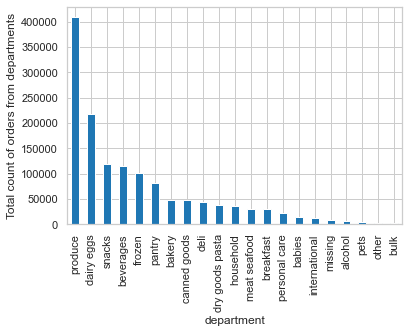

In [17]:
order_data.groupby('department').size().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Total count of orders from departments')
plt.show()

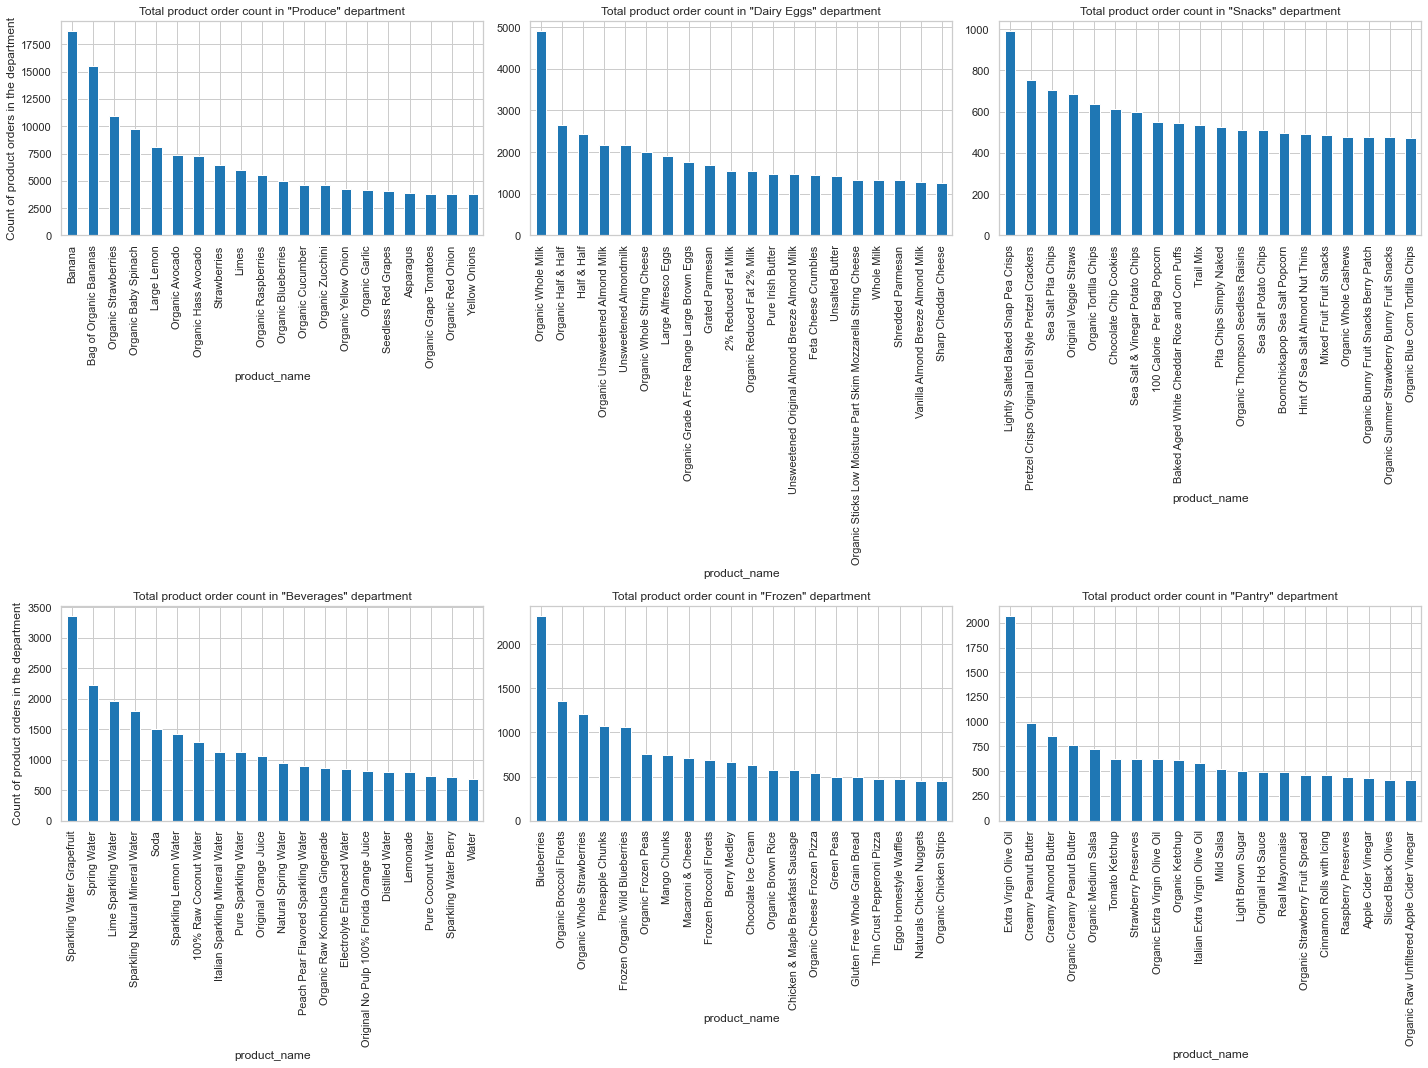

In [18]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(20,15))
order_data.query('department=="produce"').groupby('product_name').size(). \
sort_values(ascending=False)[:20].plot(kind='bar',ax=ax[0][0], \
                                       title='Total product order count in "Produce" department')

order_data.query('department=="dairy eggs"').groupby('product_name').size(). \
sort_values(ascending=False)[:20].plot(kind='bar',ax=ax[0][1], \
                                       title='Total product order count in "Dairy Eggs" department')

order_data.query('department=="snacks"').groupby('product_name').size(). \
sort_values(ascending=False)[:20].plot(kind='bar',ax=ax[0][2], \
                                       title='Total product order count in "Snacks" department')

order_data.query('department=="beverages"').groupby('product_name').size(). \
sort_values(ascending=False)[:20].plot(kind='bar',ax=ax[1][0], \
                                       title='Total product order count in "Beverages" department')

order_data.query('department=="frozen"').groupby('product_name').size(). \
sort_values(ascending=False)[:20].plot(kind='bar',ax=ax[1][1], \
                                       title='Total product order count in "Frozen" department')

order_data.query('department=="pantry"').groupby('product_name').size(). \
sort_values(ascending=False)[:20].plot(kind='bar',ax=ax[1][2], \
                                       title='Total product order count in "Pantry" department')

# set labels
plt.setp(ax[:, 0], ylabel='Count of product orders in the department')
plt.tight_layout()
plt.show()

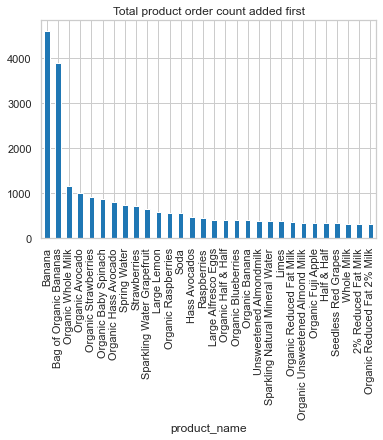

In [19]:
order_data[order_data.add_to_cart_order==1].groupby('product_name').size().sort_values(ascending=False)[:30].plot(kind='bar',\
                                       title='Total product order count added first')
plt.show()

In [20]:
order_data_filtered = order_data[order_data.department. \
                                 isin(['produce','dairy eggs','snacks','beverages','frozen','pantry'])]
order_data_filtered.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,soft drinks,beverages
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,soft drinks,beverages
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,soft drinks,beverages
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,soft drinks,beverages
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,soft drinks,beverages


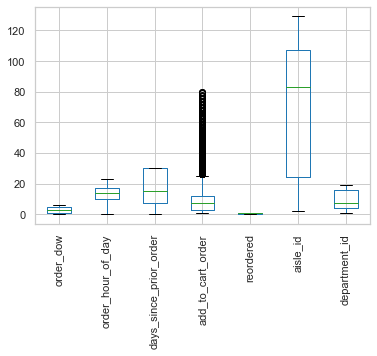

In [21]:
order_data_filtered.drop(['order_id','order_number','user_id','product_id'],axis=1).plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [22]:
#sns.catplot(hue='department',x='product_id',col='reordered',data=order_data_filtered,kind='count',ci=None)

In [23]:
#sns.catplot(hue='order_dow',x='product_id',col='reordered',data=order_data_filtered,kind='count',ci=None)
#plt.xticks([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],rotation=90)
#plt.show()

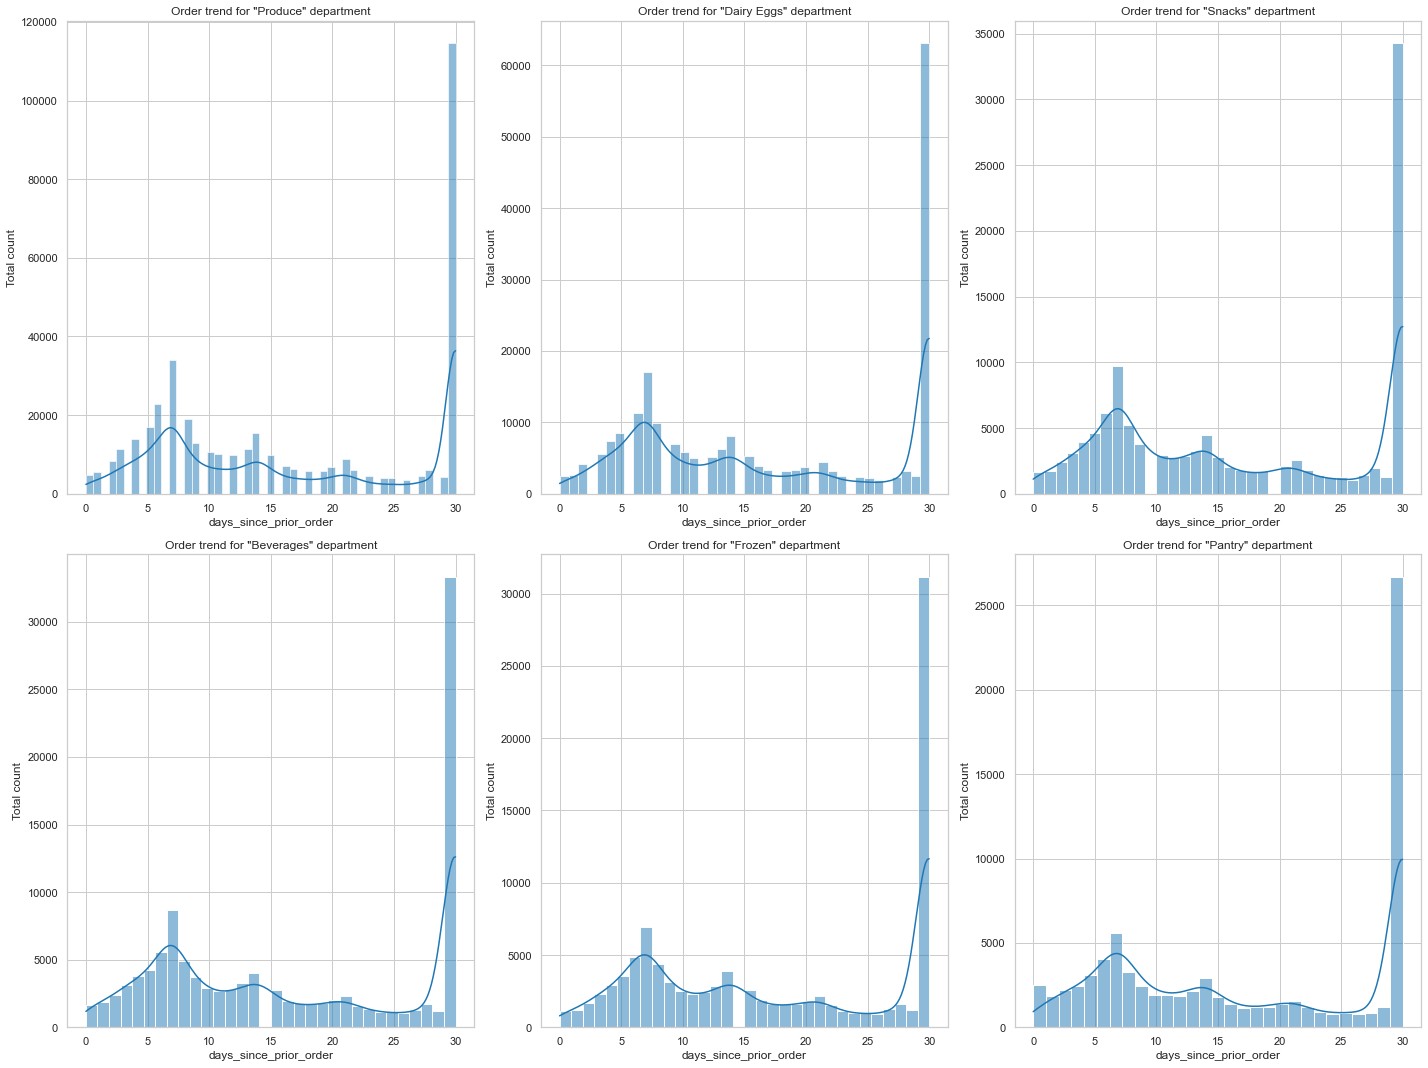

In [24]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(20,15))
x1 = order_data[order_data.department.isin(['produce'])][['days_since_prior_order']]
x2 = order_data[order_data.department.isin(['dairy eggs'])]['days_since_prior_order']
x3 = order_data[order_data.department.isin(['snacks'])]['days_since_prior_order']
x4 = order_data[order_data.department.isin(['beverages'])]['days_since_prior_order']
x5 = order_data[order_data.department.isin(['frozen'])]['days_since_prior_order']
x6 = order_data[order_data.department.isin(['pantry'])]['days_since_prior_order']

sns.histplot(x1, ax=ax[0][0],kde=True,legend=False)
sns.histplot(x2, ax=ax[0][1],kde=True)
sns.histplot(x3, ax=ax[0][2],kde=True)
sns.histplot(x4, ax=ax[1][0],kde=True)
sns.histplot(x5, ax=ax[1][1],kde=True)
sns.histplot(x6, ax=ax[1][2],kde=True)
plt.setp(ax[:, :], xlabel='days_since_prior_order',ylabel='Total count')
plt.setp(ax[0,0],title='Order trend for "Produce" department')
plt.setp(ax[0,1],title='Order trend for "Dairy Eggs" department')
plt.setp(ax[0,2],title='Order trend for "Snacks" department')
plt.setp(ax[1,0],title='Order trend for "Beverages" department')
plt.setp(ax[1,1],title='Order trend for "Frozen" department')
plt.setp(ax[1,2],title='Order trend for "Pantry" department')
plt.tight_layout()
plt.show()

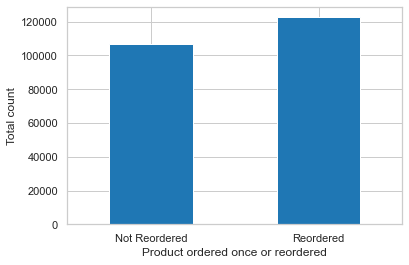

In [25]:
order_data.groupby(['order_id','user_id','order_number','reordered']).size().unstack(['reordered']).count() \
.plot(kind='bar')
plt.xticks([0,1],['Not Reordered','Reordered'],rotation=0)
plt.xlabel('Product ordered once or reordered')
plt.ylabel('Total count')
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

In [27]:
X = order_data.drop(['reordered'],axis=1).select_dtypes(exclude='object')
y = order_data.reordered
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,stratify = y,random_state=5)
print(len(Xtrain), len(Xtest), len(ytrain), len(ytest))

1107693 276924 1107693 276924


In [28]:
def model_prediction(modelObj):
    smoteObj = SMOTE()
    pipeline = make_pipeline_imb(smoteObj , modelObj)
    model = pipeline.fit(Xtrain, ytrain)
    model_predictions = model.predict(Xtest)
    
    #confusion matrices
    #conf_matrices.append(confusion_matrix(ytest, model_predictions))
        
    #Print the score metrics
    print('Test accuracy: {}'.format(accuracy_score(ytest, model_predictions)))
    print('ROC AUC score: {}'.format(roc_auc_score(ytest, model_predictions)))    
    
    # Plot ROC curve
    fpr, tpr, threshold = roc_curve(ytest, model.predict_proba(Xtest)[:,1])
    _ = plt.plot([0, 1], [0, 1], 'k--')
    _ = plt.plot(fpr, tpr)
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('ROC Curve')
    
    target_labels = ['not_reordered', 'reordered']
    print("The classification report is :")
    print(classification_report(ytest, model_predictions, target_names=target_labels))
        
    print('Confusion Matrices')
    print('.'*60)
   
    for conf_matrix in confusion_matrix(ytest, model_predictions):
        print(conf_matrix)
        print('.'*15)
    PrecisionRecallDisplay.from_predictions(ytest, model_predictions)
    return model

Test accuracy: 0.6154360041022086
ROC AUC score: 0.6306635058731458
The classification report is :
               precision    recall  f1-score   support

not_reordered       0.52      0.71      0.60    111159
    reordered       0.74      0.55      0.63    165765

     accuracy                           0.62    276924
    macro avg       0.63      0.63      0.61    276924
 weighted avg       0.65      0.62      0.62    276924

Confusion Matrices
............................................................
[78688 32471]
...............
[74024 91741]
...............


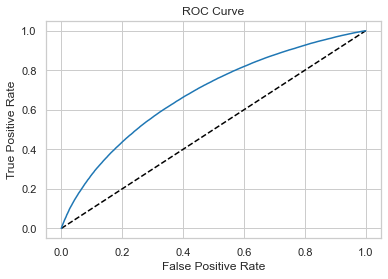

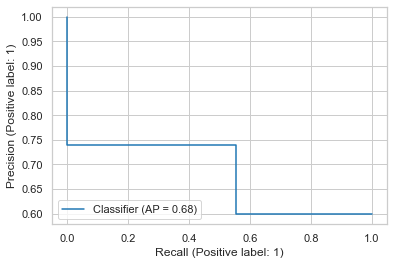

In [29]:
regModel = LogisticRegression(solver='liblinear', random_state=5)
regModel = model_prediction(regModel)

Test accuracy: 0.6106476867299331
ROC AUC score: 0.5983462763328573
The classification report is :
               precision    recall  f1-score   support

not_reordered       0.51      0.54      0.52    111159
    reordered       0.68      0.66      0.67    165765

     accuracy                           0.61    276924
    macro avg       0.60      0.60      0.60    276924
 weighted avg       0.61      0.61      0.61    276924

Confusion Matrices
............................................................
[59577 51582]
...............
[ 56239 109526]
...............


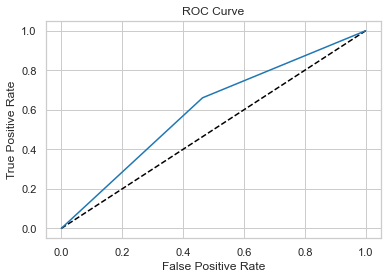

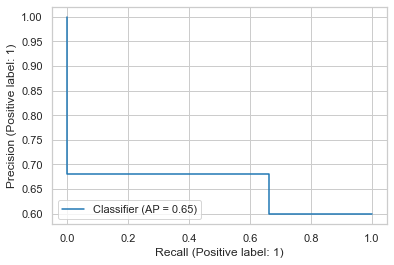

In [30]:
dtModel = DecisionTreeClassifier(random_state=5)
dtModel = model_prediction(dtModel)

Test accuracy: 0.6733652554491485
ROC AUC score: 0.6639123149722307
The classification report is :
               precision    recall  f1-score   support

not_reordered       0.59      0.62      0.60    111159
    reordered       0.73      0.71      0.72    165765

     accuracy                           0.67    276924
    macro avg       0.66      0.66      0.66    276924
 weighted avg       0.68      0.67      0.67    276924

Confusion Matrices
............................................................
[68471 42688]
...............
[ 47765 118000]
...............


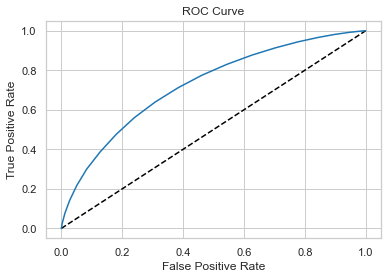

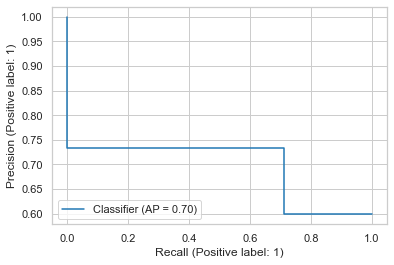

In [31]:
rfModel = RandomForestClassifier(n_estimators=20, random_state=5)
rfModel = model_prediction(rfModel)

Test accuracy: 0.656620589042481
The roc_auc_score is : 0.7183606808909393
The confusion matrix is :
[[ 74576  36583]
 [ 58507 107258]]
The classification report is :
              precision    recall  f1-score   support

           0       0.56      0.67      0.61    111159
           1       0.75      0.65      0.69    165765

    accuracy                           0.66    276924
   macro avg       0.65      0.66      0.65    276924
weighted avg       0.67      0.66      0.66    276924



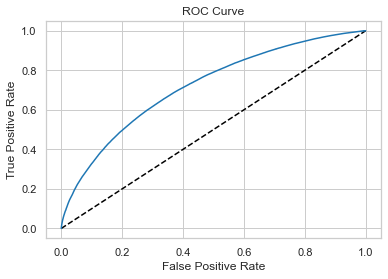

In [32]:
from xgboost import XGBClassifier
from xgboost import plot_importance

#scale_pos_weight [default=1] : Control the balance of positive and negative weights, 
#useful for unbalanced classes. 
#A typical value to consider: sum(negative instances) / sum(positive instances).
ratio = float(np.sum(y == 0)) / np.sum(y==1)

XGModel = XGBClassifier(scale_pos_weight = ratio, learning_rate =0.1, n_estimators=20, 
                        subsample=0.8, colsample_bytree=0.8,
                        objective= 'binary:logistic', nthread=4, seed=27)

XGModel.fit(Xtrain,ytrain)

y_XG_pred = XGModel.predict(Xtest)

features = XGModel.feature_importances_
yg_pred_prob = XGModel.predict_proba(Xtest)[:,1]
fpr, tpr, threshold = roc_curve(ytest, yg_pred_prob)

# Print the accuracy and other details.
print("Test accuracy: {}".format(accuracy_score(y_XG_pred, ytest)))
print("The roc_auc_score is : {}".format(roc_auc_score(ytest, yg_pred_prob)))
print("The confusion matrix is :")
print(confusion_matrix(ytest, y_XG_pred))
print("The classification report is :")
print(classification_report(ytest, y_XG_pred))

# Plot ROC curve
_ = plt.plot([0, 1], [0, 1], 'k--')
_ = plt.plot(fpr, tpr)
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')

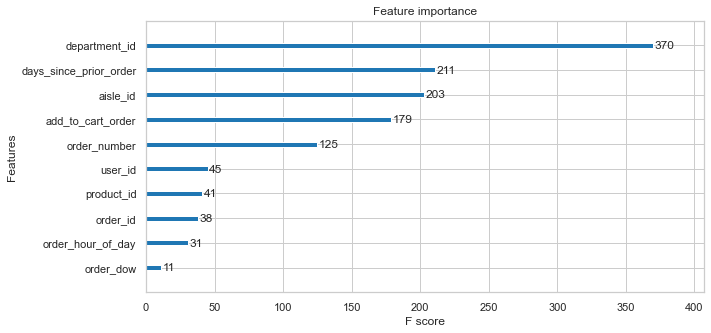

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
featureDict = XGModel.get_booster().get_fscore() 
_ = plot_importance(XGModel, ax=ax)